# Fault Detection of Smart Lathe Machine

This piece of code first takes input from the user in the form of Cutting speed, Feed Rate, Depth of Cut, RPM and diameter  values and generates the vibration RMS values. Based on the RMS value the model predicts whether the machine will produce any fault or function in a normal state.

In [1]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
exp_runs = pd.read_excel('Experimental Runs.xlsx', index_col = 0)
exp_runs.head()

Cutting Speed (m/min)  Feed (mm/rec)  Depth of cut (mm)  \
RUN                                                                          
PILOT EXPERIMENTS                    NaN            NaN                NaN   
1                                   50.0          0.142                0.8   
2                                   70.0          0.142                0.8   
3                                   90.0          0.142                0.8   
4                                  110.0          0.142                0.8   

                                 DATES    RPM  Diameter(mm)      RMS     MAXI  \
RUN                                                                             
PILOT EXPERIMENTS                  NaN    NaN           NaN      NaN      NaN   
1                  2021-03-18 00:00:00  290.0          55.0  -373.92  -297.27   
2                  2021-03-18 00:00:00  480.0          50.0 -374.027 -289.184   
3                  2021-03-18 00:00:00  480.0          55.0 -373.145 -325.407   
4                  2021-03-18 00:00:00  700.0          50.0 -373.907 -324.372   

                      MINI       P2P  ...  Unnamed: 16 Unnamed: 17  \
RUN                                   ...                            
PILOT EXPERIMENTS      NaN       NaN  ...          NaN         NaN   
1                 -457.640  160.3690  ...          NaN         NaN   
2                 -445.340  156.1570  ...          NaN         NaN   
3                 -420.140   94.7341  ...          NaN         NaN   
4                 -426.784  102.4120  ...          NaN         NaN   

                  Unnamed: 18  Unnamed: 19  Unnamed: 20  Unnamed: 21  \
RUN                                                                    
PILOT EXPERIMENTS         NaN          NaN          NaN          NaN   
1                         NaN          NaN          NaN          NaN   
2                         NaN          NaN          NaN          NaN   
3                         NaN          NaN          NaN          NaN   
4                         NaN          NaN          NaN          NaN   

                   Unnamed: 22  Unnamed: 23  Unnamed: 24  Unnamed: 25  
RUN                                                                    
PILOT EXPERIMENTS          NaN          NaN          NaN          NaN  
1                          NaN          NaN          NaN          NaN  
2                          NaN          NaN          NaN          NaN  
3                          NaN          NaN          NaN          NaN  
4                          NaN          NaN          NaN          NaN  

[5 rows x 25 columns]

In [3]:
one_min_runs = pd.read_excel('Experimental_Runs(Reg_data).xlsx', index_col = 0)
one_min_runs.head()

Cutting Speed (m/min)  Feed (mm/rec)  \
RUN                                                              
1 Minute Run Experiments                    NaN            NaN   
1                                         130.0           0.15   
2                                         130.0           0.15   
3                                         130.0           0.35   
4                                         130.0           0.45   

                          Depth of cut (mm)      DATES    RPM  Diameter(mm)  \
RUN                                                                           
1 Minute Run Experiments                NaN        NaT    NaN           NaN   
1                                       1.0 2021-02-22  700.0          60.0   
2                                       0.8 2021-02-22  700.0          60.0   
3                                       0.6 2021-02-22  700.0          60.0   
4                                       0.4 2021-02-23  700.0          60.0   

                               RMS        MAXI       MINI        P2P  \
RUN                                                                    
1 Minute Run Experiments       NaN         NaN        NaN        NaN   
1                        -373.1205 -304.564392 -427.60321  123.03881   
2                        -372.8996 -300.232000 -437.54350  137.31150   
3                        -371.8263 -254.309000 -489.70025  235.39115   
4                        -370.6829 -330.197470 -421.34536   91.14788   

                               Mean Status      Unnamed: 13  Unnamed: 14  
RUN                                                                       
1 Minute Run Experiments        NaN    NaN  (RMS-Buffer)*10          NaN  
1                        -372.95227   Done          -71.205    614.35608  
2                        -372.73350   Done          -68.996          NaN  
3                        -371.42880   Done          -58.263          NaN  
4                        -370.52707   Done          -46.829          NaN

In [4]:
df = pd.DataFrame(one_min_runs)
df.head()

Cutting Speed (m/min)  Feed (mm/rec)  \
RUN                                                              
1 Minute Run Experiments                    NaN            NaN   
1                                         130.0           0.15   
2                                         130.0           0.15   
3                                         130.0           0.35   
4                                         130.0           0.45   

                          Depth of cut (mm)      DATES    RPM  Diameter(mm)  \
RUN                                                                           
1 Minute Run Experiments                NaN        NaT    NaN           NaN   
1                                       1.0 2021-02-22  700.0          60.0   
2                                       0.8 2021-02-22  700.0          60.0   
3                                       0.6 2021-02-22  700.0          60.0   
4                                       0.4 2021-02-23  700.0          60.0   

                               RMS        MAXI       MINI        P2P  \
RUN                                                                    
1 Minute Run Experiments       NaN         NaN        NaN        NaN   
1                        -373.1205 -304.564392 -427.60321  123.03881   
2                        -372.8996 -300.232000 -437.54350  137.31150   
3                        -371.8263 -254.309000 -489.70025  235.39115   
4                        -370.6829 -330.197470 -421.34536   91.14788   

                               Mean Status      Unnamed: 13  Unnamed: 14  
RUN                                                                       
1 Minute Run Experiments        NaN    NaN  (RMS-Buffer)*10          NaN  
1                        -372.95227   Done          -71.205    614.35608  
2                        -372.73350   Done          -68.996          NaN  
3                        -371.42880   Done          -58.263          NaN  
4                        -370.52707   Done          -46.829          NaN

In [5]:
y = df[['RMS']]
X = df[['Cutting Speed (m/min)', 'Feed (mm/rec)', 'Depth of cut (mm)', 'RPM', 'Diameter(mm)']]
y = y[1:]
X = X[1:]
y[9:10] = -373.191846
y.head(10)

RMS
RUN            
1     -373.1205
2     -372.8996
3     -371.8263
4     -370.6829
5    -370.66674
6    -369.63059
7    -371.49294
8    -370.25057
9    -370.19835
10  -373.191846

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.10, random_state = 5)

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
y_test

RMS
RUN           
25   -369.9976
41  -369.00129
21   -370.1221
35   -368.7799
58   -369.6539
55   -369.0515

In [9]:
X_test.head()

Cutting Speed (m/min)  Feed (mm/rec)  Depth of cut (mm)    RPM  \
RUN                                                                   
25                    50.0           0.55                0.4  290.0   
41                    60.0           0.30                0.8  480.0   
21                    50.0           0.25                0.2  290.0   
35                    67.0           0.40                0.4  480.0   
58                    35.0           0.16                0.6  290.0   

     Diameter(mm)  
RUN                
25           55.0  
41           40.0  
21           55.0  
35           45.0  
58           38.0

In [10]:
y_pred = lr.predict(X_test)
y_pred

array([[-369.40505584],
       [-368.92114812],
       [-369.26161267],
       [-369.05748809],
       [-368.49673668],
       [-368.82455806]])

In [11]:
df_2 = pd.read_excel('D:/Internship 2021/Project Data and Codes/Lathe Vibration Project Data/Classification_data.xlsx')
df_2.head()

EXP_NO         RMS       MIN_I       MAX_I        MEAN         P2P  STATUS  \
0       0  369.778456 -412.006744 -324.709839 -369.685592   87.296905       1   
1       1  369.435434 -427.049622 -311.159180 -369.361992  115.890442       1   
2       2  369.370142 -405.845154 -328.079437 -369.276471   77.765717       1   
3       3  369.372960 -406.037720 -327.020416 -369.272910   79.017304       1   
4       4  369.222165 -457.929657 -237.918365 -369.154709  220.011292       1   

    LABEL  
0  NORMAL  
1  NORMAL  
2  NORMAL  
3  NORMAL  
4  NORMAL

In [12]:
X_2 = df_2[['RMS']]
y_2 = df_2[['STATUS']]

In [13]:
X_2_train,X_2_test,y_2_train,y_2_test = train_test_split(X_2,y_2,test_size=0.01,random_state=0)

In [14]:
logistic_regression= LogisticRegression()
model_2 = logistic_regression.fit(X_2_train,y_2_train)

d:\python 3.9\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [15]:
y_2_pred= model_2.predict(abs(y_pred))
y_2_pred

array([1, 1, 1, 1, 1, 1], dtype=int64)

In [16]:
import pickle
pickle_out1 = open("regression_pred.pkl", "wb")
pickle.dump(lr, pickle_out1)
pickle_out1.close()
pickle_out2 = open("classifier.pkl", "wb")
pickle.dump(logistic_regression, pickle_out2)
pickle_out2.close()

In [17]:
fin = lr.predict([[50.0, 0.55, 0.4, 290.0, 55.0]])

In [18]:
model_2.predict(abs(fin))

array([1], dtype=int64)

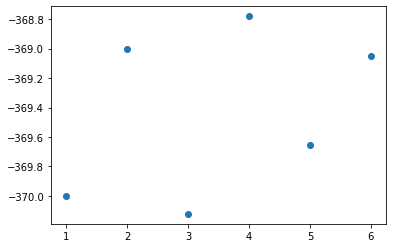

In [23]:
plt.scatter(range(1,7),y_test)
plt.show()

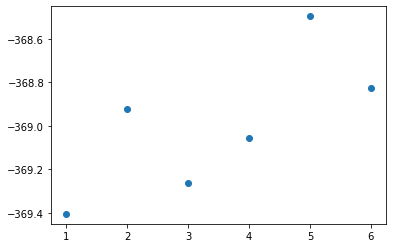

In [24]:
plt.scatter(range(1,7),y_pred)
plt.show()